In [1]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

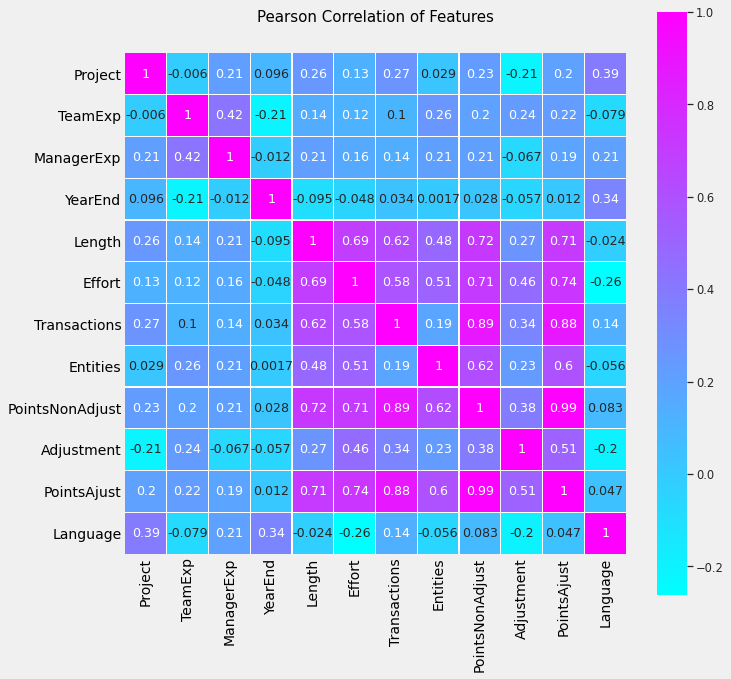

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
df_desharnais = pd.read_csv('./02.desharnais.csv',  header=0)
df_desharnais.corr()
colormap = plt.cm.cool
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [3]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

In [4]:
def accuracy(true, pred):
    count = 0
    for i in range(len(true)):
        if abs(true[i]-pred[i])<=500:
            count += 1
    return ((float(count)*100)/len(true))

def mse(true, pred):
    ans = 0
    for i in range(len(true)):
        ans+= (abs(true[i]-pred[i]))**2
    return ans/len(true)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Y = y_test.to_numpy()
Y_list = Y.tolist()

In [6]:
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
y_pred_K = neigh.predict(X_test)
pred_list_K = y_pred_K.tolist()
ans = accuracy(Y_list, pred_list_K)
m = mse(Y_list, pred_list_K)
print("K Nearest Neighbors Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", neigh.score(X_test, y_test))
print()

K Nearest Neighbors Analysis
Accuracy =  14.814814814814815
Mean square Error =  19521738.06172839
Training accuracy =  0.3695019918775658



In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_L = model.predict(X_test)
l_list = y_pred_L.tolist()
ans = accuracy(Y_list, l_list)
m = mse(Y_list, l_list)
print("Linear Regression Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", model.score(X_test, y_test))
print()

Linear Regression Analysis
Accuracy =  14.814814814814815
Mean square Error =  7183047.127637756
Training accuracy =  0.768007495444071



In [8]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)
svr_pred = LinearSVC.predict(X_test)
svr_list = svr_pred.tolist()
ans = accuracy(Y_list, svr_list)
m = mse(Y_list, svr_list)
print("Support Vector Machine Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", LinearSVC.score(X_test, y_test))
print()

Support Vector Machine Analysis
Accuracy =  14.814814814814815
Mean square Error =  7103798.805957227
Training accuracy =  0.7705669964889383



In [9]:
regressor = RandomForestRegressor(n_estimators=50)
for i in range(10):
    regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
pred_list = y_pred.tolist()
ans = accuracy(Y_list, pred_list)
m = mse(Y_list, pred_list)
print("Random forest Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", regressor.score(X_test, y_test))
print()

Random forest Analysis
Accuracy =  25.925925925925927
Mean square Error =  17693575.23208889
Training accuracy =  0.42854658201428686



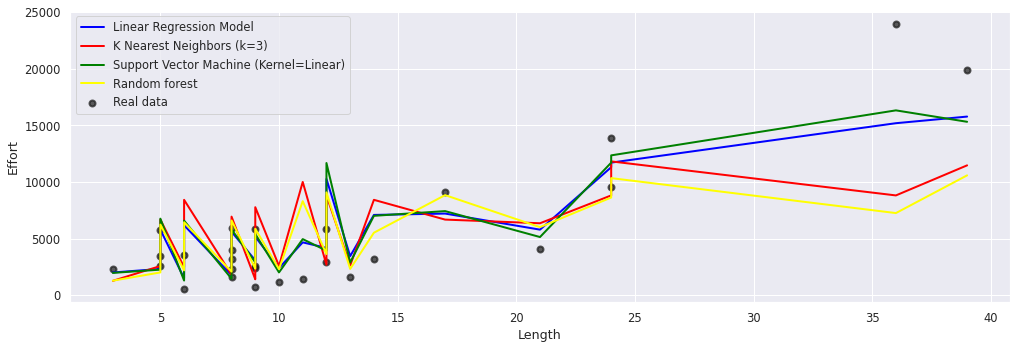

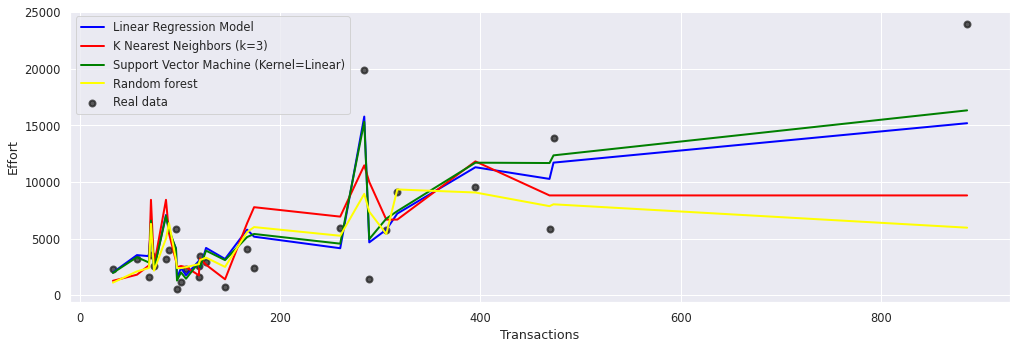

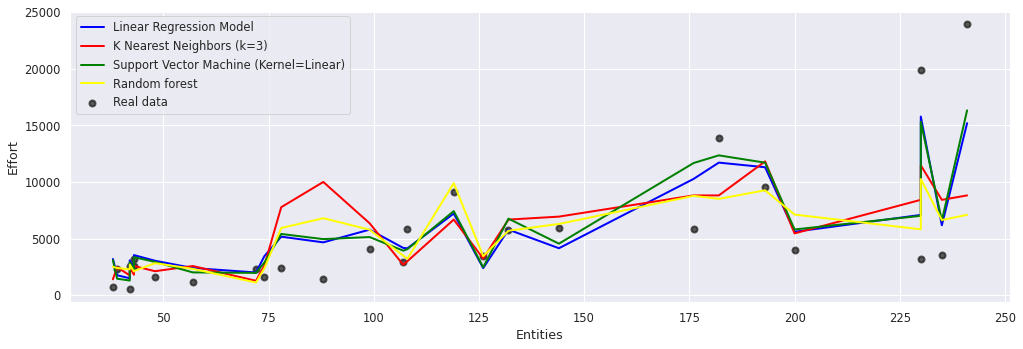

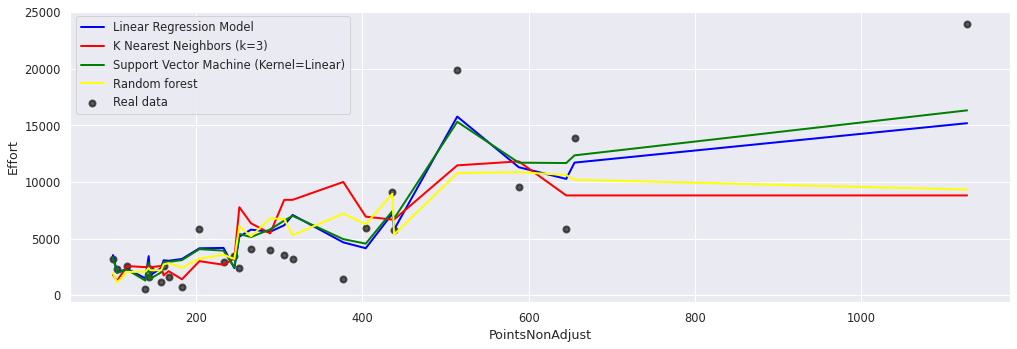

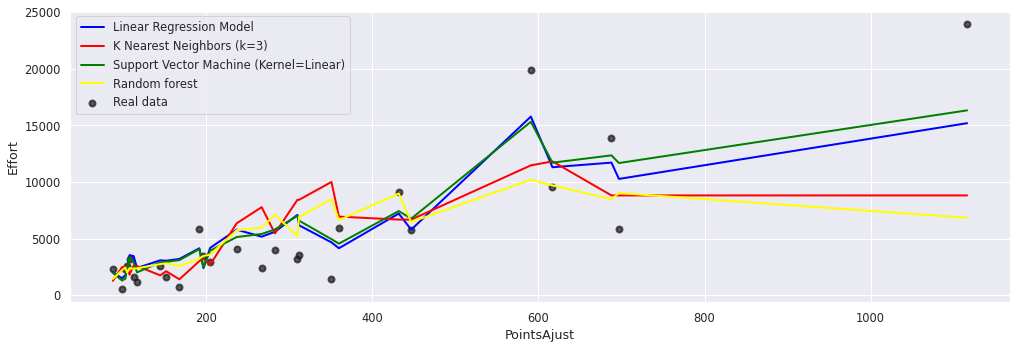

In [10]:
for i, feature in enumerate(max_corr_features):
   
    # Knn Regression Model 
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    # Linear Regression Model 
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    
    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))
    
    #Random forest Model
    rf_model_xs, rf_model_ys = zip(*sorted(zip(X_test[feature], regressor.fit(X_train, y_train).predict(X_test))))

    plt.scatter(X_test[feature], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=2, label='Linear Regression Model', c='blue')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='red')
    plt.plot(svc_model_xs, svc_model_ys , lw=2,label='Support Vector Machine (Kernel=Linear)', c='green')
    plt.plot(rf_model_xs, rf_model_ys, lw=2, label='Random forest', c='yellow')

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()